In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fact_full = pd.read_excel('.\Data\Descarga_FACTURADO_CLIENTES_NB_240823.xlsx',skiprows=1)

In [4]:
fact_full.head()

,Interno,Usuario,Cod/Empresa,Nom/Empresa,Cod/Centro Comercial,Nom/Centro Comercial,Cod/Concepto,Nom Concepto,Cod/Grupo,Nom/Grupo,...,Monto Iva,Percepcion Practicada,Total4,Suma Monto Neto,Suma Monto Iva,Suma Percepcion Practicada,Suma Total,Asesor Comercial,Rubro,Detalle
0,90685,DEBORA,1,CECNOR SA,1,NORDELTA CENTRO COMERCIAL,15,ANTICIPO EXPENSAS,1,GENERAL,...,18357.03,7867.30,113638.78,87414.45,18357.03,7867.30,113638.78,NaN,INDUMENTARIA FEMENINA,ANTICIPO EXPENSAS - NETO 21.00 %
1,91072,ANALIA,1,CECNOR SA,1,NORDELTA CENTRO COMERCIAL,31,CANON LOCATIVO TOTAL,1,GENERAL,...,90807.08,38917.32,562139.05,432414.65,90807.08,38917.32,562139.05,NaN,INDUMENTARIA FEMENINA,CANON LOCATIVO TOTAL - NETO 21.00 %
2,91190,DEBORA,1,CECNOR SA,1,NORDELTA CENTRO COMERCIAL,15,ANTICIPO EXPENSAS,1,GENERAL,...,19480.15,8348.63,120591.38,92762.60,19480.15,8348.63,120591.38,NaN,INDUMENTARIA FEMENINA,ANTICIPO EXPENSAS - NETO 21.00 %
3,91550,ANALIA,1,CECNOR SA,1,NORDELTA CENTRO COMERCIAL,31,CANON LOCATIVO TOTAL,1,GENERAL,...,96063.24,41169.96,594677.19,457443.99,96063.24,41169.96,594677.19,NaN,INDUMENTARIA FEMENINA,CANON LOCATIVO TOTAL - NETO 21.00 %
4,91461,DEBORA,1,CECNOR SA,1,NORDELTA CENTRO COMERCIAL,15,ANTICIPO EXPENSAS,1,GENERAL,...,20526.60,8797.12,127069.43,97745.71,20526.60,8797.12,127069.43,NaN,INDUMENTARIA FEMENINA,ANTICIPO EXPENSAS - NETO 21.00 %


In [5]:
df_fact = fact_full.groupby(by = 'Periodo', sort = True)['Suma Total'].sum().reset_index()
df_fact.rename(columns={'Periodo': 'mes', 'Suma Total': 'fact'}, inplace = True)
df_fact.set_index('mes', inplace = True)
df_fact.head()

,fact
mes,
2019-01-01,22150781.76
2019-02-01,20681481.53
2019-03-01,22316953.30
2019-04-01,22943028.41
2019-05-01,22975503.75


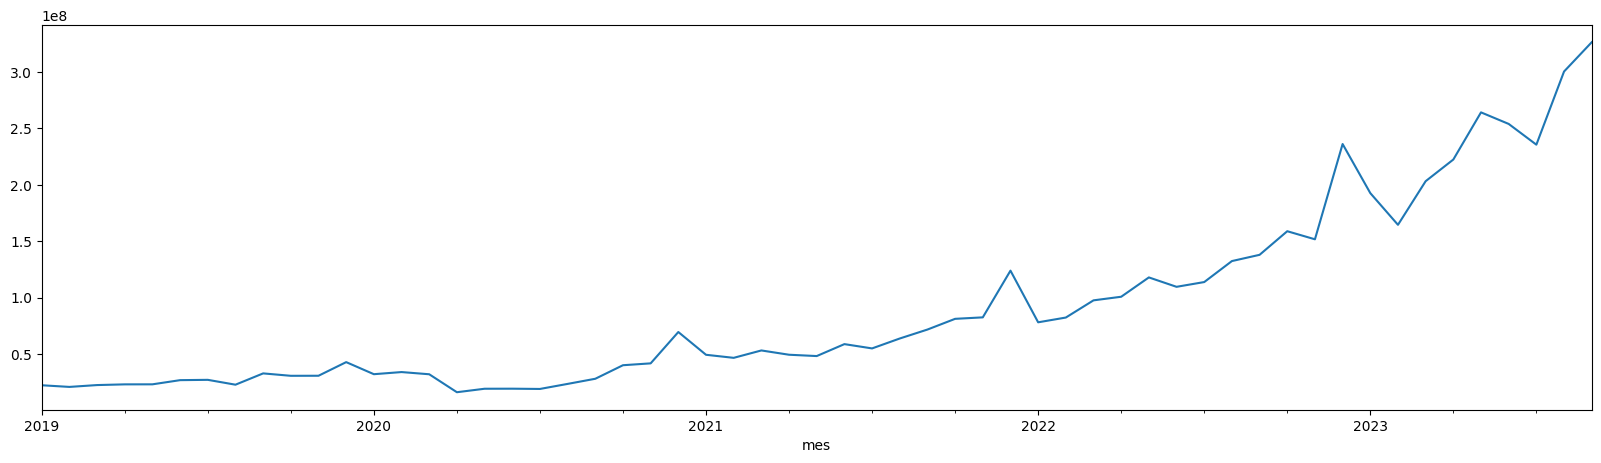

In [6]:
df_fact.fact.plot(figsize=(20,5), title = "")
plt.show()

In [7]:
vent_full = pd.read_excel('.\Data\Descarga_VENTAS_POR_LOCALES_NB_050923.xlsx',skiprows=1)

In [8]:
vent_full.head()

,Centro Comercial,Local,Superficie,Razón Social,Identificacion,Nombre Comercial,Contrato,Rubro,Periodo,Estado,Faltan,Cero,Valores,Rubros,Cantidad,Importe,Calculo
0,NORDELTA CENTRO COMERCIAL,1,101.8,MUEBLES EXPRESS S.R.L.,30709532312,DELLACASA,644,DECORACION,07/2022,Abierto,NaN,13.0,MONTOS TOTALES (IVA 21%),GENERAL,27.0,4379919.00,3619767.76
1,NORDELTA CENTRO COMERCIAL,101,211.0,AVE CAESAR S.R.L.,30652248582,SENSU,699,GASTRONOMIA,07/2022,Abierto,NaN,NaN,MONTOS TOTALES (IVA 21%),GENERAL,2980.0,7630451.01,6306157.85
2,NORDELTA CENTRO COMERCIAL,102,204.5,LAS BLONDAS SA,30702637895,RAPSODIA,403,INDUMENTARIA FEMENINA,07/2022,Abierto,NaN,NaN,MONTOS TOTALES (IVA 21%),GENERAL,1421.0,28705514.00,23723565.29
3,NORDELTA CENTRO COMERCIAL,103/A,81.3,KOWZEF S.A.,30677399879,HERENCIA ARGENTINA,562,INDUMENTARIA MASCULINA,07/2022,Abierto,NaN,NaN,MONTOS TOTALES (IVA 21%),GENERAL,779.0,12426009.52,10269429.34
4,NORDELTA CENTRO COMERCIAL,103/B,56.6,TEJIDOS LATINOS SA,30707718133,WANAMA BOYS & GIRLS,563,INDUMENTARIA NIÑOS,07/2022,Abierto,NaN,NaN,MONTOS TOTALES (IVA 21%),GENERAL,414.0,4745312.22,3921745.65


In [26]:
df_vent = vent_full.groupby(by = 'Periodo', sort = True)['Importe'].sum().reset_index()
df_vent.rename(columns={'Periodo': 'mes', 'Importe': 'ventas'}, inplace = True)
df_vent.mes = pd.to_datetime(df_vent.mes, dayfirst = True, format = '%m/%Y')
df_vent = df_vent.sort_values(by = 'mes')
df_vent.set_index('mes', inplace = True)
df_vent.head()

,ventas
mes,
2015-01-01,62633592.89
2015-02-01,62563213.35
2015-03-01,70487376.77
2015-04-01,68644186.80
2015-05-01,70835132.46


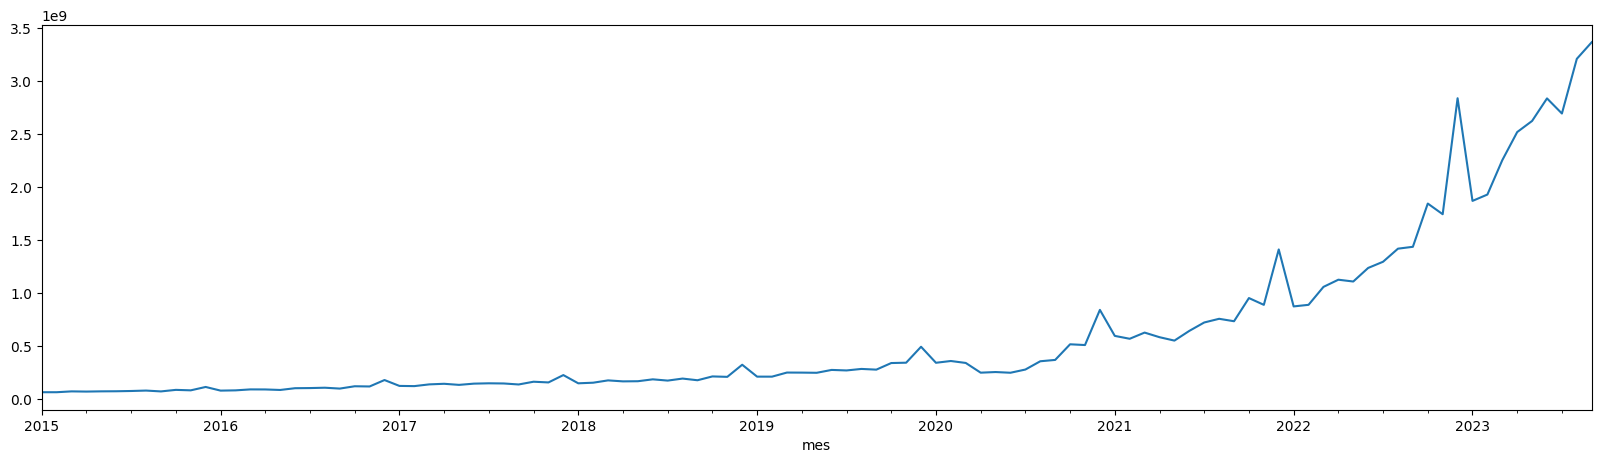

In [28]:
df_vent.ventas.plot(figsize=(20,5), title = "")
plt.show()